In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv("C:/Users/Sineth/Desktop/advertising.csv")

In [2]:
df.isnull().sum()


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [3]:
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# Data Preparation

In [5]:
df.rename(columns={'Male':'Sex'},inplace=True)


In [6]:
df['Date'] = df['Timestamp'].apply(lambda x: x.split()[0])

In [7]:
df['Time'] = df['Timestamp'].apply(lambda x:x.split()[1])


In [8]:

df.loc[(df['Time']>='00:00:00')&(df['Time']<'12:00:00'),'Time of the Day']='Morning'
df.loc[(df['Time']>='12:00:00')&(df['Time']<'18:00:00'),'Time of the Day']='Afternoon'
df.loc[(df['Time']>='18:00:00')&(df['Time']<'24:00:00'),'Time of the Day']='Evening'


In [9]:
df['Month']=df['Date'].apply(lambda x:x.split('-')[1])


In [10]:
df.drop(['Ad Topic Line','City','Country','Date', 'Time', 'Timestamp'],axis=1,inplace = True)

In [11]:
time = {'Morning' : 1, 'Afternoon': 2, 'Evening': 3}
df['Time of the Day'] = df['Time of the Day'].map(time)


In [12]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Sex,Clicked on Ad,Time of the Day,Month
0,68.95,35,61833.90,256.09,0,0,1,03
1,80.23,31,68441.85,193.77,1,0,1,04
2,69.47,26,59785.94,236.50,0,0,3,03
3,74.15,29,54806.18,245.89,1,0,1,01
4,68.37,35,73889.99,225.58,0,0,1,06


In [13]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Sex,Clicked on Ad,Time of the Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,1.768000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,0.841953
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,1.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,1.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,2.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,3.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,3.000000


# Visualizations


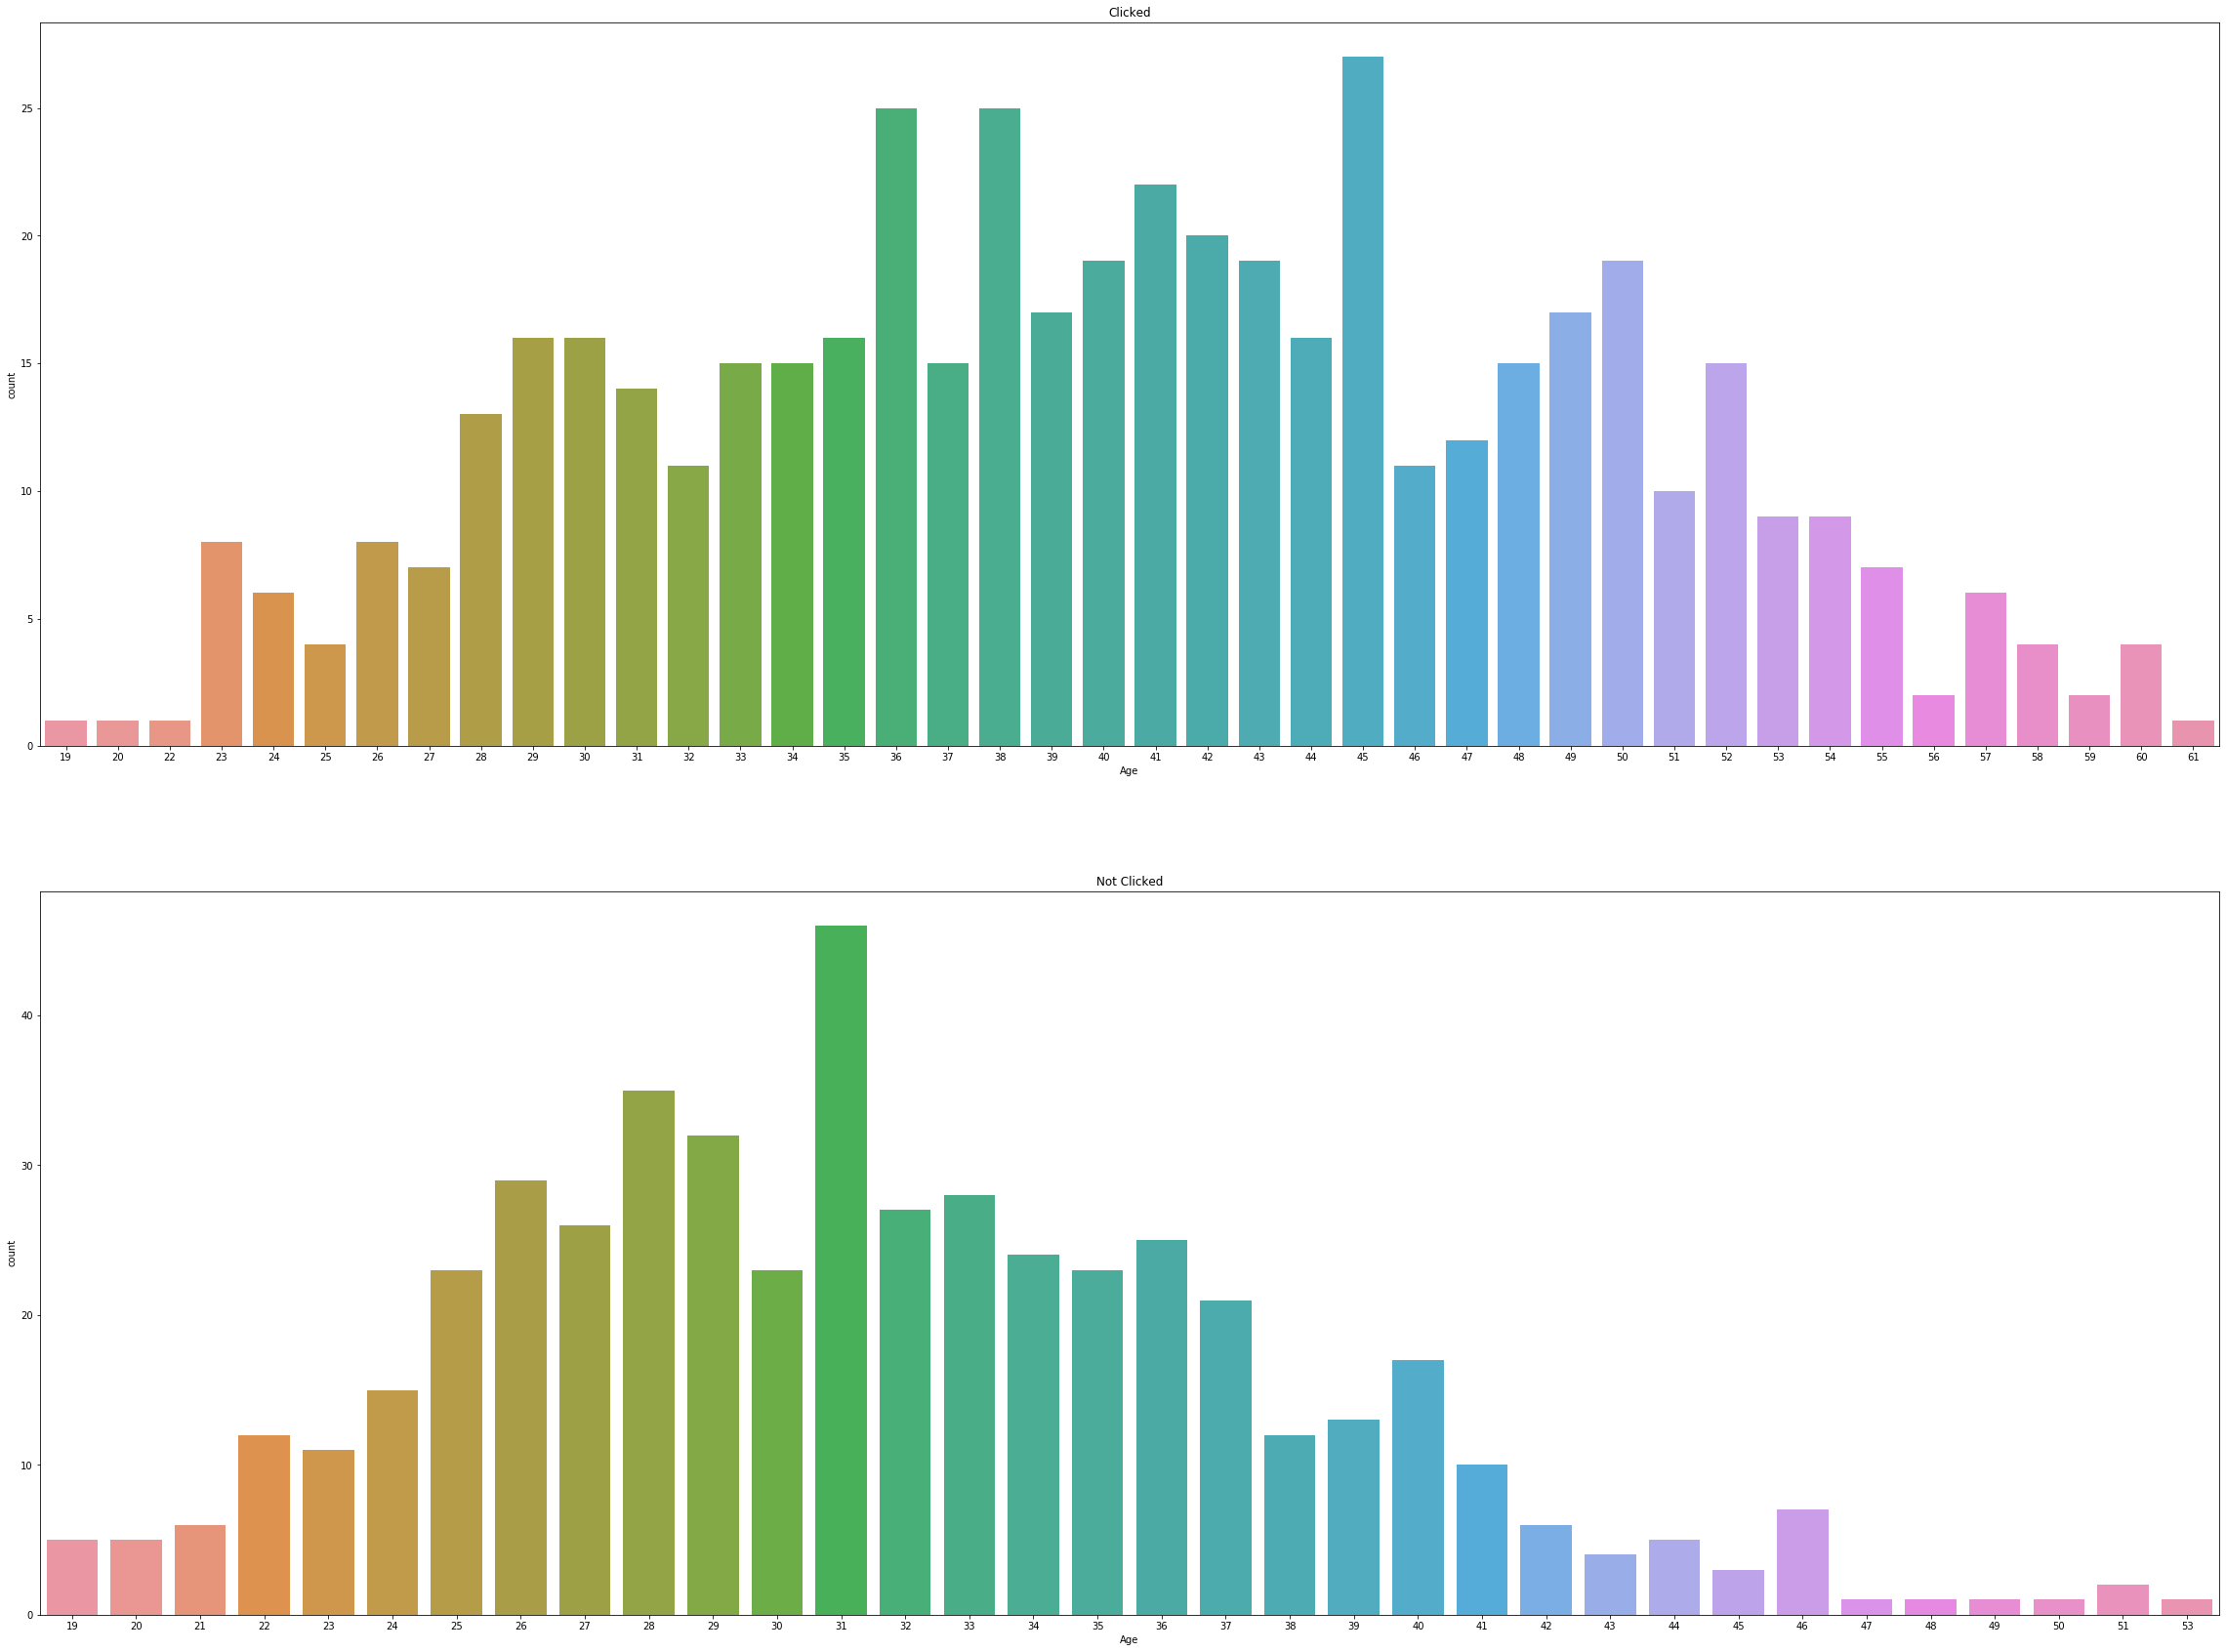

In [14]:
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('Clicked')
ax1.tick_params(labelbottom='off',axis='x')
sns.countplot(df[df['Clicked on Ad']==1]['Age']);
ax2 = fig.add_subplot(2,1,2)
ax2.set_title("Not Clicked")
sns.countplot(df[df['Clicked on Ad']==0]['Age']);




C:\Users\Sineth\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sineth\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sineth\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


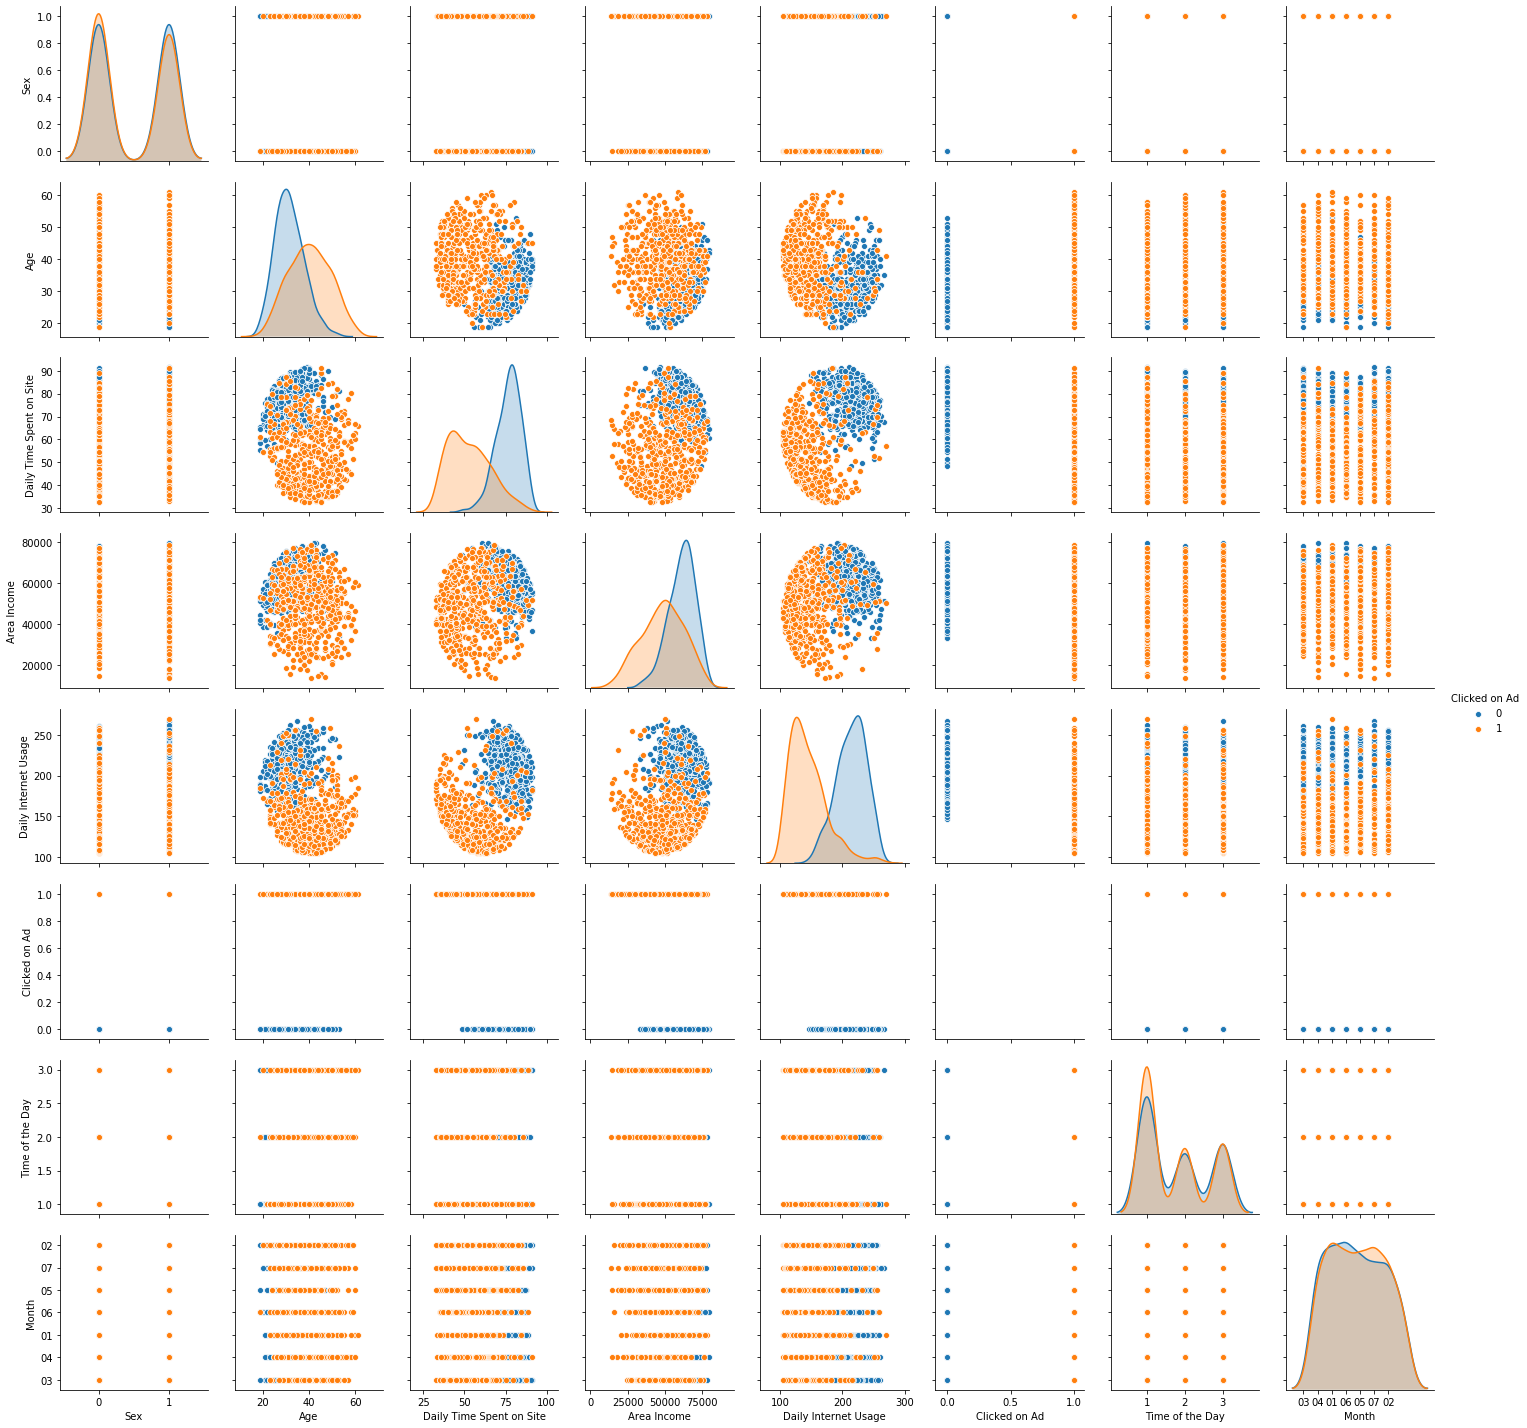

In [15]:
sns.pairplot(df[['Sex','Age', 'Daily Time Spent on Site', 'Area Income','Daily Internet Usage', 'Clicked on Ad','Time of the Day','Month']],hue='Clicked on Ad',size=2.5);

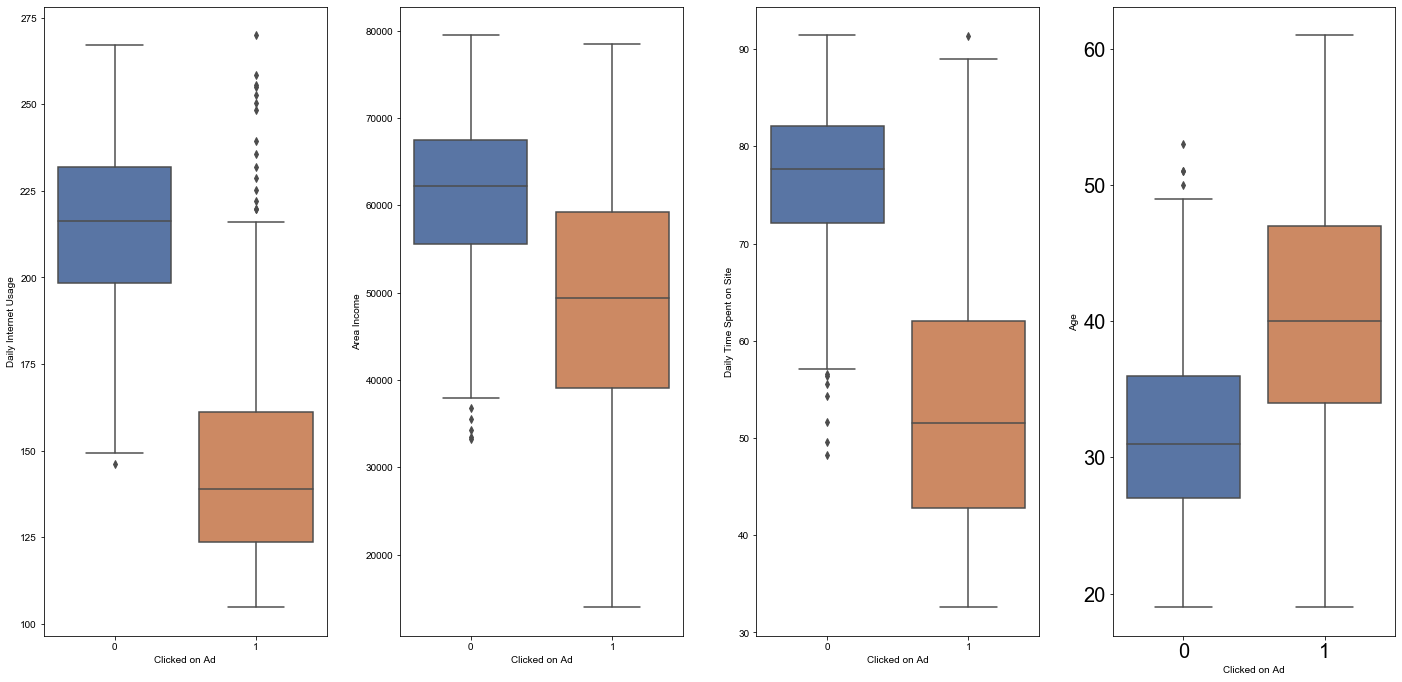

In [16]:
f, axes = plt.subplots(1, 4,figsize=(20,10))
sns.set(font_scale=2)
sns.boxplot(x=df['Clicked on Ad'], y=df['Daily Internet Usage'], ax=axes[0]);
sns.boxplot(x=df['Clicked on Ad'], y=df['Area Income'], ax=axes[1]);
sns.boxplot(x=df['Clicked on Ad'], y=df['Daily Time Spent on Site'], ax=axes[2]);
sns.boxplot(x=df['Clicked on Ad'], y=df['Age'], ax=axes[3]);



plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()


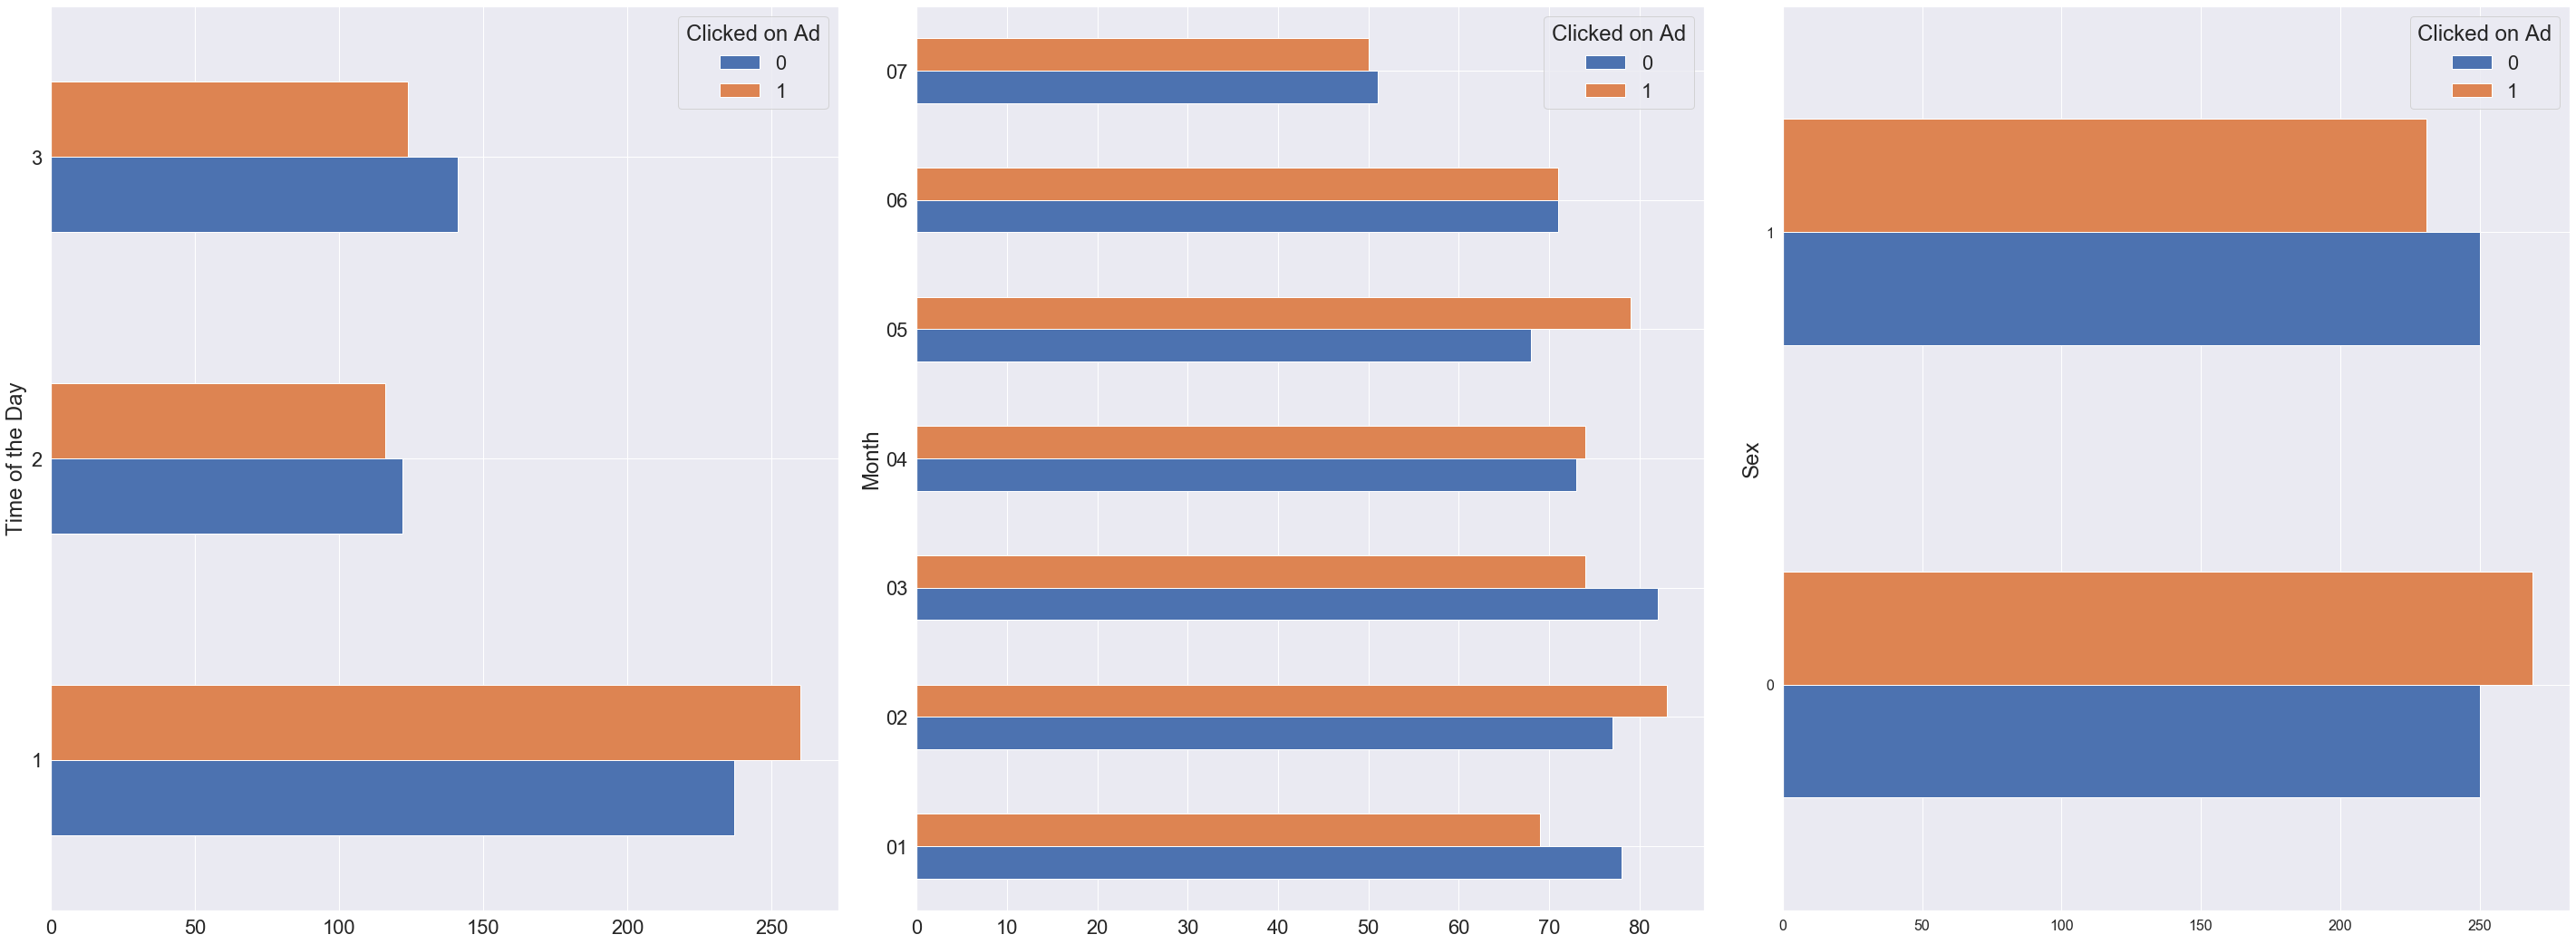

In [17]:
f, axes = plt.subplots(1, 3,figsize=(40,15))
sns.set(font_scale=2)

pd.crosstab(df['Time of the Day'],df['Clicked on Ad']).plot(kind='barh', ax=axes[0]);
pd.crosstab(df['Month'],df['Clicked on Ad']).plot(kind='barh', ax=axes[1]);
pd.crosstab(df['Sex'],df['Clicked on Ad']).plot(kind='barh', ax=axes[2]);

plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

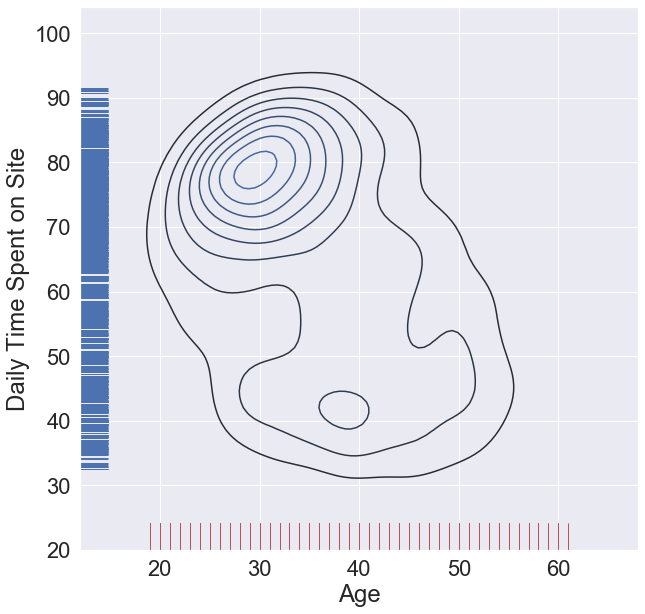

In [18]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df.Age, df['Daily Time Spent on Site'], color="b", ax=ax)
sns.rugplot(df.Age, color="r", ax=ax)
sns.rugplot(df['Daily Time Spent on Site'], vertical=True, ax=ax)

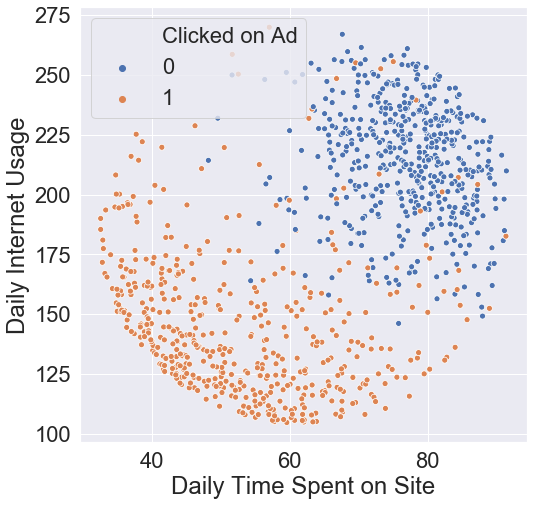

In [19]:
f, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(x=df['Daily Time Spent on Site'],y=df['Daily Internet Usage'],hue=df['Clicked on Ad'])

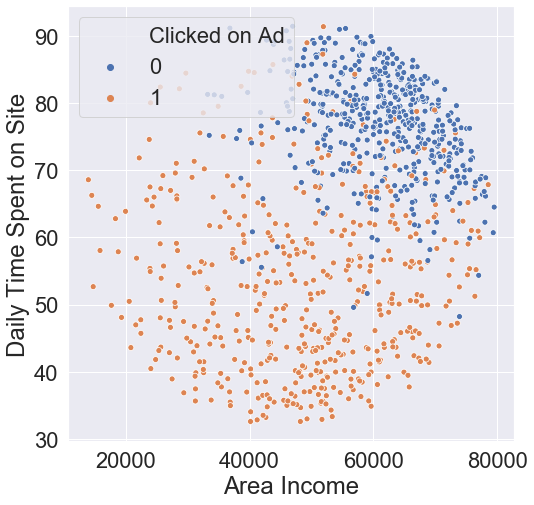

In [20]:
f, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(x=df['Area Income'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])

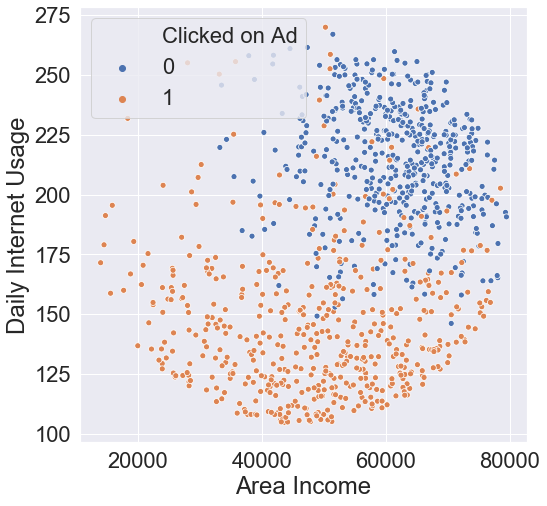

In [21]:
f, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(x=df['Area Income'],y=df['Daily Internet Usage'],hue=df['Clicked on Ad'])

In [22]:

print('Average Usage of Internet vs. Clicks: ', df[df['Clicked on Ad'] == 1]['Daily Internet Usage'].mean())
print('Average Usage of Internet vs. No Clicks: ', df[df['Clicked on Ad'] == 0]['Daily Internet Usage'].mean())


Average Usage of Internet vs. Clicks:  145.48646000000005
Average Usage of Internet vs. No Clicks:  214.51373999999979


In [23]:
print('Average Time Spent on the Site vs. Clicks: ', df[df['Clicked on Ad'] == 1]['Daily Time Spent on Site'].mean())
print('Average Time Spent on the Site vs. No Clicks: ', df[df['Clicked on Ad'] == 0]['Daily Time Spent on Site'].mean())

Average Time Spent on the Site vs. Clicks:  53.14577999999996
Average Time Spent on the Site vs. No Clicks:  76.85461999999998


In [24]:
print('Average Area Income of Internet vs. Clicks: ', df[df['Clicked on Ad'] == 1]['Area Income'].mean())
print('Average Area Income of Internet vs. No Clicks: ', df[df['Clicked on Ad'] == 0]['Area Income'].mean())

Average Area Income of Internet vs. Clicks:  48614.413739999996
Average Area Income of Internet vs. No Clicks:  61385.58641999997


# Data Analysis

In [25]:

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 123)

In [26]:
ad = train_set.copy()


In [27]:
ad = train_set.drop("Clicked on Ad", axis = 1)

ad_labels = train_set["Clicked on Ad"].copy()



# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

RF = RandomForestClassifier(random_state=123)

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':  [4, 5, 10, 20, 50, 75, 90, 100]}]

grid_search_RF = GridSearchCV(RF, param_grid, cv=5 ,scoring='roc_auc')
grid_search_RF.fit(ad, ad_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=123,
                                 

In [31]:
grid_search_RF.best_params_

{'n_estimators': 50}

# Random Forest Scores

In [32]:
cvres_RF = grid_search_RF.cv_results_

for mean_score, params in zip(cvres_RF["mean_test_score"], cvres_RF["params"]):
    print(mean_score, params)

0.9764360031840912 {'n_estimators': 4}
0.9785456858493514 {'n_estimators': 5}
0.984920790846226 {'n_estimators': 10}
0.9873584031684638 {'n_estimators': 20}
0.989858676648695 {'n_estimators': 50}
0.9896867943233317 {'n_estimators': 75}
0.9895305223472418 {'n_estimators': 90}
0.9896399242069073 {'n_estimators': 100}


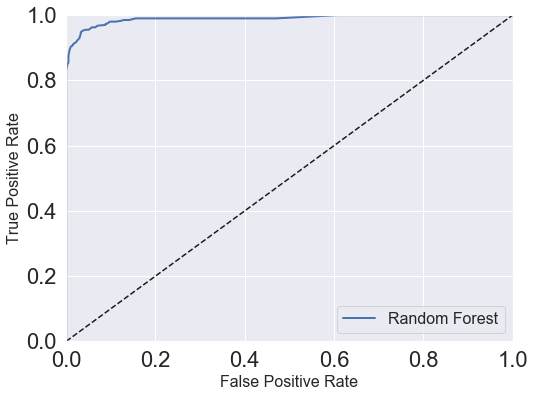

In [33]:
best_RF_model = grid_search_RF.best_estimator_

y_probas_RF = cross_val_predict(best_RF_model, ad, ad_labels, cv=5, method="predict_proba")
y_scores_RF = y_probas_RF[:, 1] 
fpr_RF, tpr_RF, thresholds_RF = roc_curve(ad_labels,y_scores_RF)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
param_grid = {'penalty':  ['l1', 'l2'],
              'C' :[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search_Lr = GridSearchCV(logreg, param_grid, cv=5 ,scoring='roc_auc')
grid_search_Lr.fit(ad, ad_labels)

C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentat

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [35]:
grid_search_Lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

# Logistic Regression Scores


In [36]:
cvres_Lr = grid_search_Lr.cv_results_

for mean_score, params in zip(cvres_Lr["mean_test_score"], cvres_Lr["params"]):
    print(mean_score, params)

nan {'C': 0.001, 'penalty': 'l1'}
0.9591847065947803 {'C': 0.001, 'penalty': 'l2'}
nan {'C': 0.01, 'penalty': 'l1'}
0.9612160640334426 {'C': 0.01, 'penalty': 'l2'}
nan {'C': 0.1, 'penalty': 'l1'}
0.9604036763556806 {'C': 0.1, 'penalty': 'l2'}
nan {'C': 1, 'penalty': 'l1'}
0.9579658345053914 {'C': 1, 'penalty': 'l2'}
nan {'C': 10, 'penalty': 'l1'}
0.9575283345053915 {'C': 10, 'penalty': 'l2'}
nan {'C': 100, 'penalty': 'l1'}
0.9591223042662916 {'C': 100, 'penalty': 'l2'}
nan {'C': 1000, 'penalty': 'l1'}
0.9593723384513204 {'C': 1000, 'penalty': 'l2'}


C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

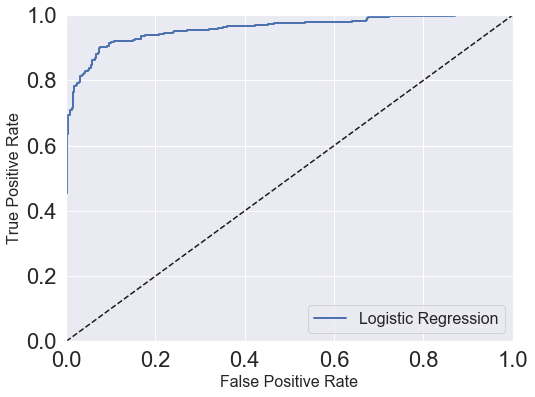

In [37]:
best_Lr_model = grid_search_Lr.best_estimator_

y_probas_Lr = cross_val_predict(best_Lr_model, ad, ad_labels, cv=5, method="predict_proba")
y_scores_Lr = y_probas_Lr[:, 1] 
fpr_Lr, tpr_Lr, thresholds_Lr = roc_curve(ad_labels,y_scores_Lr)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_Lr, tpr_Lr, "Logistic Regression")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

In [39]:
param_grid = [{'n_neighbors':  [3, 5, 10, 20]}]

grid_search_KNN = GridSearchCV(KNN, param_grid, cv=5 ,scoring='roc_auc')
grid_search_KNN.fit(ad, ad_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [3, 5, 10, 20]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [40]:
grid_search_KNN.best_params_

{'n_neighbors': 3}

# KNN Scores

In [41]:
cvres_KNN = grid_search_KNN.cv_results_
for mean_score, params in zip(cvres_KNN["mean_test_score"], cvres_KNN["params"]):
    print(mean_score, params)

0.7651269509884358 {'n_neighbors': 3}
0.7448602345092984 {'n_neighbors': 5}
0.7359383497421471 {'n_neighbors': 10}
0.7440183720112516 {'n_neighbors': 20}


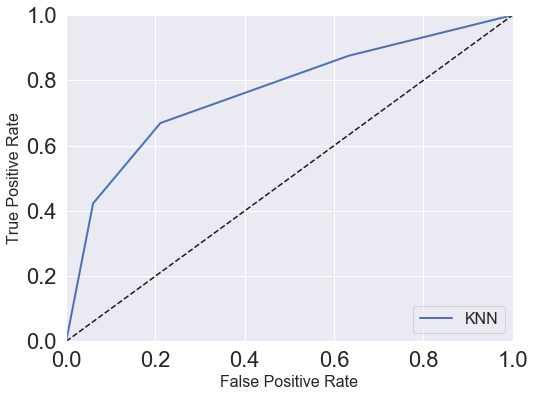

In [42]:
best_KNN_model = grid_search_KNN.best_estimator_

y_probas_KNN = cross_val_predict(best_KNN_model, ad, ad_labels, cv=5, method="predict_proba")
y_scores_KNN = y_probas_KNN[:, 1] 
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(ad_labels,y_scores_KNN)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_KNN, tpr_KNN, "KNN")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Train Set ROC Curves

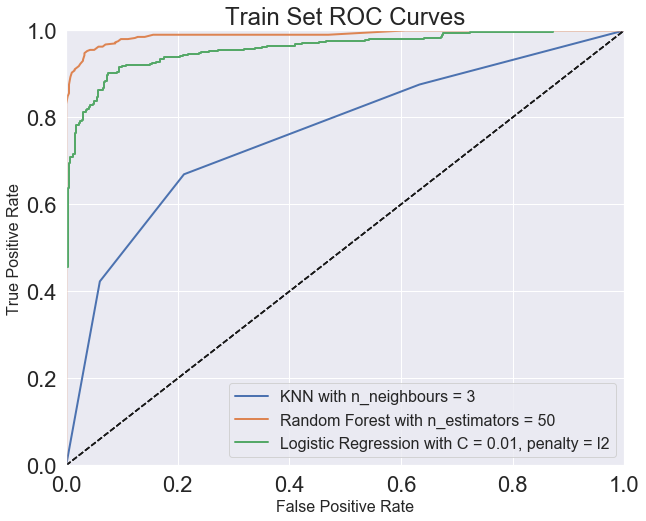

In [43]:
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr_KNN, tpr_KNN, "KNN with n_neighbours = 3")
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest with n_estimators = 50 ")
plot_roc_curve(fpr_Lr, tpr_Lr, "Logistic Regression with C = 0.01, penalty = l2")
plt.title('Train Set ROC Curves')
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [44]:
ad_test = test_set.drop("Clicked on Ad", axis = 1)

ad_test_labels = test_set["Clicked on Ad"].copy()



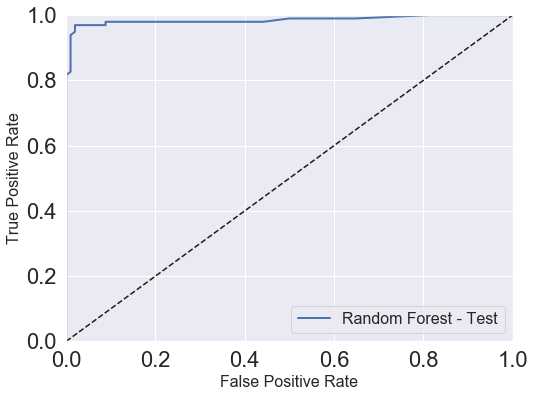

In [45]:
y_probas_RF_test = cross_val_predict(best_RF_model, ad_test, ad_test_labels, cv=5, method="predict_proba")
y_scores_RF_test = y_probas_RF_test[:, 1] 
fpr_RF_test, tpr_RF_test, thresholds_RF_test = roc_curve(ad_test_labels,y_scores_RF_test)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF_test, tpr_RF_test, "Random Forest - Test")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [46]:
y_probas_Lr_test = cross_val_predict(best_Lr_model, ad_test, ad_test_labels, cv=5, method="predict_proba")
y_scores_Lr_test = y_probas_Lr_test[:, 1] 
fpr_Lr_test, tpr_Lr_test, thresholds_Lr_test = roc_curve(ad_test_labels,y_scores_Lr_test)

y_probas_KNN_test = cross_val_predict(best_KNN_model, ad_test, ad_test_labels, cv=5, method="predict_proba")
y_scores_KNN_test = y_probas_KNN_test[:, 1] 
fpr_KNN_test, tpr_KNN_test, thresholds_KNN_test = roc_curve(ad_test_labels,y_scores_KNN_test)


In [47]:
roc_auc_score(ad_test_labels, y_scores_RF_test)

0.9851440576230492

In [48]:
roc_auc_score(ad_test_labels, y_scores_KNN_test)


0.6552621048419367

In [49]:
roc_auc_score(ad_test_labels, y_scores_Lr_test)


0.95578231292517

# Test Set ROC Curves

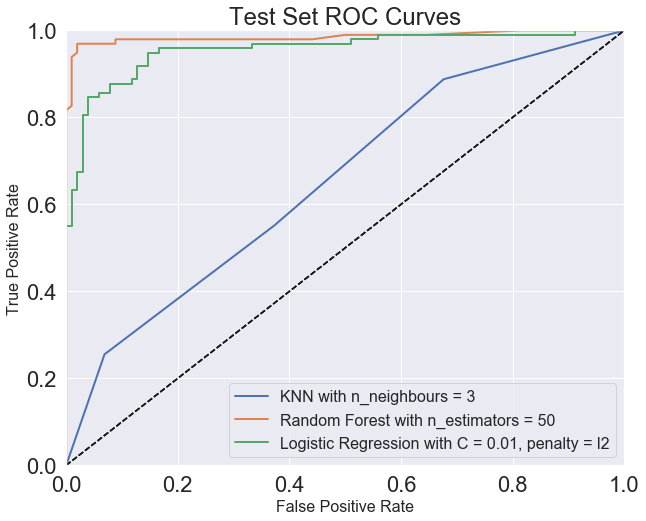

In [50]:
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr_KNN_test, tpr_KNN_test, "KNN with n_neighbours = 3")
plot_roc_curve(fpr_RF_test, tpr_RF_test, "Random Forest with n_estimators = 50 ")
plot_roc_curve(fpr_Lr_test, tpr_Lr_test, "Logistic Regression with C = 0.01, penalty = l2")
plt.title('Test Set ROC Curves')

plt.legend(loc="lower right", fontsize=16)
plt.show()

In [52]:
best_RF_model.feature_importances_

array([0.35149018, 0.11749751, 0.10491017, 0.38365488, 0.01080352,
       0.01108719, 0.02055653])

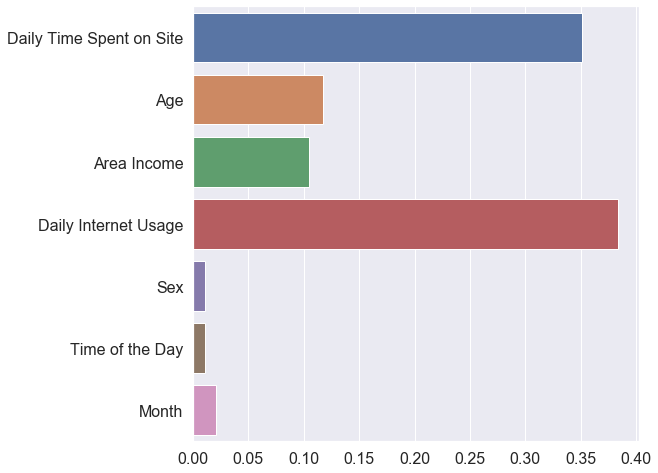

In [53]:
feat_imp = pd.DataFrame(best_RF_model.feature_importances_, index = ad_test.columns)
plt.figure(figsize=(8,8));
sns.barplot(feat_imp[0],feat_imp.index);
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('');